# Sélection de variables

On s'intéresse ici à $n$ individus  $\mathbf x_i, i\in[\![1,n]\!]$ décrits par $d$ variables quantitatives ou caractéristiques (features), $x_i\in \mathbb{R}^d$. Avec l'avènement des Big Data, et la généralisation des capteurs, $d$ peut être très grand (plusieurs milliers), et analyser telles quelles les données brutes devient difficile d'un point de vue calculatoire et interprétation. De plus, il est rare que les caractéristiques soient totalement utiles et indépendantes. 

Une étape souvent utilisée en analyse de données consiste donc à prétraiter cet espace, par exemple pour :

- le transformer en un format compatible avec des algorithmes qui seront utilisés
- réduire la complexité temporelle des algorithmes qui seront utilisés
- réduire la complexité spatiale du problème traité
- découpler des variables et chercher les dépendances
- introduire des a priori, ou des propriétés importantes pour les algorithmes (données centrées normées, descripteurs épars...)
- permettre une interprétation plus intuitive et/ou graphique ({ref}`figure 2<tsne>`) 



```{figure} ./images/tsne.png
:name: tsne

Exemple de réduction de dimension (source: Maaten & Hinton, 2008). Des images 28$\times$ 28 de chiffres manuscrits sont représentées par un vecteur de 784 valeurs, puis transformés en vecteurs de $\mathbb{R}^2$ pour les projeter dans le plan. La méthode utilisée permet d'optimiser la transformation de sorte à ce que les images représentant le même chiffre soient regroupées dans des nuages compacts.
``` 



Deux stratégies peuvent alors être utilisées :
1. sélectionner un sous-ensemble des variables initiales comme descripteurs des individus
2. calculer de nouveaux descripteurs à partir des variables initiales.

Nous nous intéressons ici à la première approche, la seconde (extraction de caractéristiques) étant abordée pour une approche linéaire dans le chapitre sur l'analyse en composantes principales.


```{prf:remark}
:class: dropdown
Les méthodes d'extraction de caractéristiques peuvent être soit linéaires (on recherche des combinaisons linéaires des variables initiales  permettant d'optimiser un cerrtain critère), ou non linéaires (on parle également de manifold learning)
```



## Définitions
La sélection de caractéristiques consiste à choisir parmi les $d$ descripteurs d'un ensemble d'individus $\mathbf x_i,i\in[\![1,n]\!]$, un sous-ensemble de  $t<d$  caractéristiques jugées "les plus pertinentes", les $d-t$ restantes étant ignorées.  

On note $F = \left (f_1\cdots f_d\right )$ les $d$ caractéristiques.  On note $Perf$ une fonction qui permet d'évaluer un sous-ensemble de caractéristiques, et on suppose que $Perf$ atteint son maximum pour le meilleur sous-ensemble de caractéristiques ("le plus pertinent"). Le problème de sélection se formule donc comme un problème d'optimisation

$$\hat{F} = Arg\displaystyle\max_{U\subset F} Perf(U)$$

le cardinal $|\hat{F|}$ de $\hat{F}$ étant soit contrôlé par l'utilisateur, soit défini par l'algorithme de sélection.

On distingue alors trois stratégies : 

- $|\hat{F|}$ est défini par l'utilisateur et l'optimisation s'effectue sur tous les sous-ensembles ayant ce cardinal
- On connaît une mesure minimale de performance $\gamma$  et la sélection recherche le plus petit sous-ensemble $U$ dont la performance $Perf(U)$ est supérieure ou égale à $\gamma$ 
- On cherche un compromis entre l'amélioration de la performance $Perf(U)$ et la réduction de la taille du sous ensemble.


La mesure de pertinence d'une caractéristique est donc au centre des algorithmes de sélection. Plusieurs définitions sont possibles, et nous dirons ici  qu'une caractéristique $f_i$ est :

- pertinente si son absence entraîne une détérioration significative de la performance de l'algorithme utilisé en aval (classification ou régression)
- peu pertinente si elle n'est pas pertinente et s'il existe un sous-ensemble $U$ tel que la performance de $U\cup\{f_i\}$ est significativement meilleure que la peformance de $U$
- non pertinente, si elle ne rentre pas dans les deux premières définitions. En général, ces caractéristiques sont supprimées.


## Caractéristiques des méthodes de sélection
Une méthode de sélection basée sur l'optimisation de $Perf$ utilise généralement trois étapes. Les  deux dernières sont itérées jusqu'à un test d'arrêt.
 
### Initialisation
L'initialisation consiste à choisir l'ensemble de départ des caractéristiques. Il peut s'agir de l'ensemble vide, de $F$ tout entier, ou un sous-ensemble quelconque $U\subset F$.

### Exploration des sous-ensembles
A partir de cette initialisation, les stratégies d'exploration des sous-ensembles de caractéristiques se déclinent en trois catégories : 

1. génération exhaustive : tous les sous-ensembles de caractéristiques sont évalués. Si elle garantit de trouver la valeur optimale, cette méthode n'est que peu applicable dès que $|F|$ devient important ($2^{|F|}$ sous-ensembles possibles)
2. génération heuristique : une génération itérative est effectuée, chaque itération permettant de sélectionner ou de rejeter une ou plusieurs caractéristiques. La génération peut être ascendante (ajout de caractéristiques à partir de l'ensemble vide), descendante (suppression de caractéristiques à partir de $F$), ou mixte. 
3. génération stochastique : pour un ensemble de données et une initialisation définie, une stratégie de recherche heuristique retourne toujours le même sous-ensemble, ce qui la rend très sensible au changement
de l'ensemble de données. La génération stochastique génère aléatoirement un nombre fini de sous-ensembles de caractéristiques afin de sélectionner le meilleur. La convergence est sous-optimale mais peut s'avérer préférable dans des algorithmes d'apprentissage, par exemple pour éviter le phénomène de surapprentissage.


### Evaluation des sous-ensembles

#### Filtres
Le critère d'évaluation utilisé évalue la pertinence d'une caractéristique selon des mesures
qui reposent sur les propriétés de données d'apprentissage.

Pour $n$ exemples  $\mathbf x_i, i\in[\![1,n]\!]$ , on note $\mathbf x_i=\left (x_{i1} \cdots x_{id} \right )^T\in\mathbb{R}^d$  une donnée d'apprentissage (la $j^e$ caractéristique $f_j$ ayant donc pour valeur $x_{ij}$) , d'étiquette $y_i$ (en classification ou régression). Les méthodes de type filtres calculent un score pour évaluer le degré de pertinence de chacune des caractéristiques $f_i$ , parmi lesquelles on peut citer

- Le critère de corrélation, utilisé en classification binaire 

$$C_i =\frac{\displaystyle\sum_{k=1}^n\left (x_{ki} -\mu_i\right )\left (y_{k} -\mu_k\right )}{\sqrt{\displaystyle\sum_{k=1}^n\left (x_{ki} -\mu_i\right )^2\displaystyle\sum_{k=1}^n\left (y_{k} -\mu_k\right )^2}}$$

où $\mu_i$ (resp. $\mu_k$) est la moyenne de la caractéristique $f_i$ observée sur $\mathbf x_1\cdots \mathbf x_n$ (resp. moyenne des étiquettes)
- Le critère de Fisher,  qui permet de mesurer dans un problème de classification à $C$ classes le degré de séparabilité des classes à l'aide
d'une caractéristique donnée

$$F_i = \frac{\displaystyle\sum_{c=1}^C n_c\left (\mu_c^i-\mu_i \right )^2}{\displaystyle\sum_{c=1}^C n_c(\Sigma_c^i)^2}$$

où $n_c, \mu_c^i$ et $\Sigma_c^i$ sont l'effectif, la moyenne et l'écart-type de la caractéristique  $f_i$ dans la classe $c$ 
- l'information mutuelle

$$I(i) = \displaystyle\sum_{\mathbf x_i} \displaystyle\sum_{y}P(X=\mathbf x_i,Y=y)log\left ( \frac{P(X=\mathbf x_i,Y=y)}{P(X=\mathbf x_i)P(Y=y)}\right )$$

qui mesure la dépendance entre les distributions de deux populations. Ici $X$ et $Y$ sont deux variables aléatoires dont les réalisations sont les valeurs de $f_i$ et des étiquettes de classes. Les probabilités sont estimées de manière fréquentiste.

Dans l'exemple suivant, on choisit de garder $|\hat{F|}=2$ descripteurs, en contrôlant la pertinence par l'information mutuelle en classification.

In [1]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
X, y = load_iris(return_X_y=True)
print("Taille des données avant : ",X.shape)
s = SelectKBest(mutual_info_classif,k=2)
X2 = s.fit_transform(X, y)
print("Taille des données après : ",X2.shape)
print("Variables sélectionnées : ", s.get_support())

Taille des données avant :  (150, 4)
Taille des données après :  (150, 2)
Variables sélectionnées :  [False False  True  True]


#### Méthodes enveloppantes
Le principal inconvénient des approches précédentes est le fait qu'elles ignorent l'influence des caractéristiques sélectionnées sur la performance de l'algorithme à utiliser par la suite. Les méthodes de type enveloppantes (wrappers)  évaluent un sous-ensemble de caractéristiques par sa performance
de classification en utilisant un algorithme d'apprentissage.  Les sous-ensembles de caractéristiques sélectionnés par cette méthode sont bien adaptés à l'algorithme de classification utilisé, mais ils ne sont pas nécessairement pour un autre. De plus, la complexité de l'algorithme d'apprentissage rend ces méthodes coûteuses.

Les principales différences entre les filtres et les méthodes enveloppantes pour la sélection des caractéristiques sont les suivantes :

- Les filtres mesurent la pertinence des caractéristiques par leur corrélation avec la variable dépendante, tandis que les méthodes enveloppantes mesurent l'utilité d'un sous-ensemble de caractéristiques en entraînant un modèle sur celles-ci.
- Les filtres sont beaucoup plus rapides que les méthodes enveloppantes car elles n'impliquent pas l'apprentissage des modèles. D'un autre côté, les méthodes enveloppantes sont également très coûteuses en termes de calcul.
- Les filtres utilisent des méthodes statistiques pour l'évaluation d'un sous-ensemble de caractéristiques, tandis que les méthodes enveloppantes utilisent la validation croisée.
- Les filtres peuvent échouer à trouver le meilleur sous-ensemble de caractéristiques dans de nombreuses occasions, mais les méthodes enveloppantes peuvent toujours fournir le meilleur sous-ensemble de caractéristiques.
- L'utilisation d'un sous-ensemble de caractéristiques à partir des méthodes enveloppantes amène plus facilement au phénomène de surapprentissage 

```{prf:remark}
:class: dropdown
Les wrappers sélectionnent les caractéristiques en se fondant sur une estimation du risque réel.
```


#### Méthodes intégrées
Les méthodes intégrées incluent la sélection de variables lors du processus d'apprentissage. Un tel mécanisme intégré pour la sélection des caractéristiques peut être trouvé, par
exemple, dans les algorithmes de type SVM,  AdaBoost  ou dans les
arbres de décision.

## Quelques méthodes de sélection

### Suppression des descripteurs à variance faible
Une première idée simple consiste à supprimer les descripteurs ayant une faible variance, ces derniers n'étant pas discriminants dans la définition des individus.

In [2]:
from sklearn.feature_selection import VarianceThreshold
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

v = VarianceThreshold(threshold=.5)
X2 = v.fit_transform(X)

print("Avant sélection, ",X.shape)
print("Après sélection, ",X2.shape)
print("Variables sélectionnées : ", v.get_support())

Avant sélection,  (150, 4)
Après sélection,  (150, 3)
Variables sélectionnées :  [ True False  True  True]


### Sélection par permutation
On mesure l'importance d'un descripteur en calculant l'augmentation de l'erreur de prédiction d'un modèle entraîné sur les données après la permutation du descripteur. Un descripteur est "important" si la permutation de ses valeurs augmente l'erreur du modèle, car dans ce cas, le modèle s'est appuyé sur lui pour la prédiction. Le descripteur est "sans importance" si la permutation de ses valeurs laisse l'erreur du modèle inchangée, car dans ce cas, le modèle n'a pas tenu compte de la valeur pour la prédiction.

On note dans la suite $\mathbf X\in\mathcal M_{n,d}(\mathbb{R})$ la  matrice des $n$ individus et $\mathbf y\in\mathbb{R}^n$ le vecteur des étiquettes (classification) ou valeurs (régression), $y_i$ étant la valeur cible de l'infividu $\mathbf x_i$.

```{prf:algorithm} Sélection par permutation
:label: Permutation
**Entrée :** un modèle entraîné $f$, des données $\mathbf X, \mathbf y$, une mesure d'erreur  $L$ 

**Sortie :** Les valeurs d'importance des descripteurs triées
1. Estimer l'erreur originale du modèle sur les $n$ individus $\varepsilon = L(\mathbf y,f(\mathbf X))$
2. Pour chaque descripteur $f_j$
    1. Permuter la colonne $j$ dans $\mathbf X$ $\rightarrow$ matrice  $\mathbf X_p$
    2. Estimer l'erreur $\varepsilon_p = L(\mathbf y,f(\mathbf X_p))$
    3. Calculer le score d'importance de permutation : ($s_j = \varepsilon_p/\varepsilon$ ou $s_j = \varepsilon_p-\varepsilon$) 
3. Trier les $s_j$ par ordre décroissant
```

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.cluster import KMeans

data = load_iris()  
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


model = KMeans(n_clusters=2).fit(X_train, y_train)

r = permutation_importance(model, X_test, y_test,n_repeats=30,random_state=0)

for i in r.importances_mean.argsort()[::-1]:
         print(f"{data.feature_names[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

petal length (cm)77.803 +/- 12.963
petal width (cm)39.936 +/- 6.399
sepal length (cm)30.218 +/- 6.479
sepal width (cm)5.483 +/- 1.083


### Gain d'information
Le gain d'information est une statistique qui mesure la réduction de l'entropie (incertitude) pour une caractéristique spécifique en divisant les données selon cette caractéristique. Plus le gain d'information d'une caractéristique est élevé, plus elle est utile pour la prise de décision. Cette méthode est un filtre. Précédemment, nous avions fixé la taille de $|hat F|$, ici nous choisissons une représentation graphique permettant d'apprécier l'importance de chacun des descripteurs.

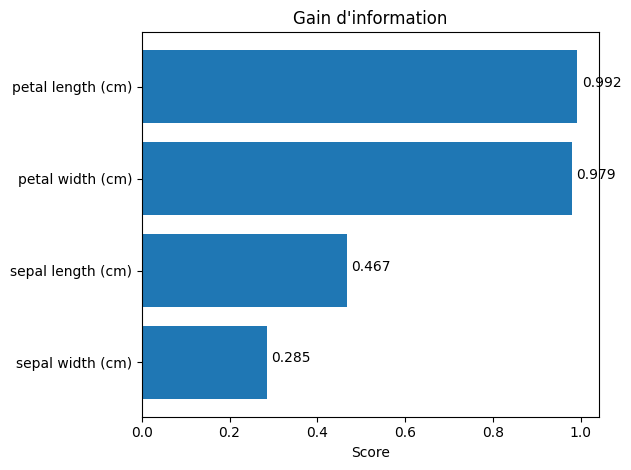

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.feature_selection import mutual_info_classif

data = load_iris()
X = data.data
y = data.target

ig = mutual_info_classif(X, y)

scores = {}
for i in range(len(data.feature_names)):
    scores[data.feature_names[i]] = ig[i]
sorted_features = sorted(scores.items(), key=lambda x: x[1], reverse=True)

fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()  
ax.set_xlabel("Score")
ax.set_title("Gain d'information")

for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)))
plt.tight_layout()
plt.show()

### Algorithmes de sélection séquentielle
Les algorithmes SFS (Sequential Forward Selection, {prf:ref}`SFS`) et SBS (Sequential Backward Selection, {prf:ref}`SFS`-rouge) ont été les premiers à être proposés. Ils utilisent des approches heuristiques de recherche en partant, pour la première, d'un ensemble de caractéristiques vide et pour la seconde de  $F$ tout entier. 


```{prf:algorithm} Algorithmes SFS et SBS
:label: SFS
**Entrée :** $F = \left (f_1\cdots f_d\right )$, taille de l'ensemble final  $T$

**Sortie :** $\hat{F}$

1. $\hat{F}\leftarrow \emptyset\quad$ (<span style="color:red">$\hat{F}\leftarrow F$</span>) 
2.  Pour $i=1$ à $ T\quad$ (<span style="color:red">$i=1$ à $d-T$</span>)
    1. Pour $j=1$ à $ |{F}|\quad$ (<span style="color:red">$j=1$ à $|\hat{F}|$</span>)
        1. Evaluer $\{f_j\}\cup \hat{F}\quad$ (<span style="color:red">$\hat{F}\setminus \{f_j\}$</span>)
    2. $f_{max}$ = meilleure caractéristique $\quad$ (<span style="color:red">$f_{min}$=moins bonne caractéristique</span>)
    3. $\hat{F}\leftarrow\hat{F}\cup\{f_{max}\}, F=F\setminus f_{max}\quad$ (<span style="color:red">$\hat{F}\setminus\hat{F}f_{min}$</span>)
```

L'étape d'évaluation utilise des données d'apprentissage : une heuristique évalue, sur un critère de performance, l'intérêt d'ajouter (ou de supprimer) le descripteur $f_i$.

Des variantes autour de ces algorithmes simples ont été proposées depuis et par exemple : 

- il est possible à chaque itération d'inclure (ou d'exclure) un sous-ensemble de caractéristiques, plutôt qu'une seule (méthodes GSFS et GSBS)
- on peut appliquer $p$ fois SFS puis $q$ fois SBS, de manière itérative, avec $p,q$ des paramètres qui peuvent évoluer au cours des itérations (algorithme SFFS et SFBS)


Dans l'exemple suivant, l'heuristique choisie est l'algorithme des 3 plus proches voisins et la mesure de performance sous-jacente est la mesure de validation croisée.

In [5]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=3)
sfs.fit(X, y)

print("Taille des données avant sélection",X.shape)
print("Taille des données après sélection",sfs.transform(X).shape)
print("Variables sélectionnées : ", sfs.get_support())

Taille des données avant sélection (150, 4)
Taille des données après sélection (150, 3)
Variables sélectionnées :  [ True False  True  True]


### Algorithme Focus
L'algorithme de filtrage Focus ({prf:ref}`FOCUS`) repose sur une recherche exhaustive sur $F$ pour trouver le sous-ensemble le plus performant de taille optimale. On illustre ici le cas de la classification, où chaque $\mathbf x_i$ a un label $y_i$ (une classe).


```{prf:algorithm} Algorithme FOCUS
:label: FOCUS
**Entrée :** $A= \{\mathbf x_i=\left (x_{i1} \cdots x_{id} \right )^T\in\mathbb{R}^d,i\in[\![1,n]\!]\}$ , taille de l'ensemble final  $T$, seuil $\epsilon$

**Sortie :** $\hat{F}$

1. $\hat{F}\leftarrow \emptyset$ 
2.  Pour $i=1$ à $ T$
    1. chaque sous-ensemble $S_i$ de taille $i$
        1. Si Inconsistance(A,$S_i$)<$\epsilon$
            1. $\hat{F}\leftarrow S_i$
3. Retourner $\hat{F}$
```
Ici, la notion de consistance peut s'entendre de la manière suivante : il n'existe pas deux exemples dans $S_i$ qui sont en accord sur tous les descripteurs mais qui ne concordent pas sur la classe. La notion d'accord des descripteurs peut par exemple se fonder sur un critères de distance. 

### Algorithme relief
La méthode relief en classification binaire ({prf:ref}`relief`), propose de calculer une mesure globale de la pertinence des caractéristiques en accumulant la différence des distances entre des exemples d'apprentissage choisis aléatoirement et leurs plus proches voisins de la même classe et de l'autre classe.


```{prf:algorithm} Algorithme Relief
:label: relief
**Entrée :** $A= \{\mathbf x_i=\left (x_{i1} \cdots x_{id} \right )^T\in\mathbb{R}^d,1\leq i\leq n  \}$ , nombre d'itérations $T$

**Sortie :** $w\in\mathbb{R}^d$ un vecteur de poids des caractéristiques, $w_i\in[-1,1],i\in[\![1,d]\!]$

1. Pour $i=1$ à $ d$
    1. $w_i\leftarrow 0$
2. Pour $i=1$ à $ T$
    1. Choisir aléatoirement un exemple $\mathbf x_k$
    2. Chercher deux plus proches voisins de $\mathbf x_k$, l'un ($\mathbf x_p$) dans sa  classe, l'autre ($\mathbf x_q$) dans l'autre classe
    3. Pour $j=1$ à $d$
        1. $w_j\leftarrow w_j+\frac{1}{nT}\left (|x_{kj} -x_{qj}|-|x_{kj} -x_{pj}| \right )$
```

### Méthode SAC
L'algorithme SAC (Selection Adaptative de Caractéristiques)  construit un ensemble de classifieurs (ou de régresseurs) $(M_1\cdots M_d)$ appris sur chacun des descripteurs et sélectionne les meilleurs par discrimination linéaire de Fisher. Pour ce faire, l'algorithme construit un vecteur dont les éléments sont les performances $Perf(M_i)$ des modèles $M_i$, triés par ordre décroissant. Deux moyennes $m_1(i)$ et $m_2(i)$ sont calculées, qui représentent les deux moyennes de performance d'apprentissage qui ont une valeur respectivement plus grande (plus petite) que la performance du modèle $M_i$ : 

$$m_1(i) = \frac{1}{i}\displaystyle\sum_{j=1}^i Perf (M_j)\textrm{ et } m_2(i) = \frac{1}{d-i}\displaystyle\sum_{j=i+1}^d Perf (M_j)$$

Deux variances des performances  $v_1^2(i)$ et $ v_2^2(i)$ sont alors calculées à partir de ces moyennes, et le sous-ensemble de caractéristiques sélectionné est celui qui maximise le discriminant de Fisher

$$\frac{|m_1(i)-m_2(i)|}{v_1^2(i)+v_2^2(i)}$$


### Algorithme RFE
L'algorithme RFE (Recursive Feature Elimination) trie les descripteurs en analysant, localement, la sensibilité de la performance. 
Étant donné un prédicteur $f$ qui attribue des poids aux caractéristiques (par exemple, les coefficients d'un modèle linéaire), l'objectif de l'algorithme est de sélectionner les caractéristiques en considérant de manière récursive des ensembles de caractéristiques de plus en plus petits. Tout d'abord, le prédicteur $f$ est entraîné sur l'ensemble initial de caractéristiques et l'importance de chaque caractéristique est calculée par un algorithme dédié (critère de Gini, entropie...). Les caractéristiques les moins importantes sont éliminées de l'ensemble actuel de caractéristiques. Cette procédure est répétée de manière récursive sur l'ensemble élagué jusqu'à ce que le nombre souhaité de caractéristiques à sélectionner soit finalement atteint.

In [6]:
from sklearn.feature_selection import RFE 
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
X, y = load_iris(return_X_y=True)
estimator = DecisionTreeClassifier()
s = RFE(estimator, n_features_to_select=2, step=1)
s.fit(X, y)

print("Taille des données avant sélection",X.shape)
print("Variables sélectionnées : ", s.get_support())
print("Classement des variables : ",s.ranking_)

Taille des données avant sélection (150, 4)
Variables sélectionnées :  [False False  True  True]
Classement des variables :  [3 2 1 1]


### Valeurs de Shapley

Terminons par une méthode plus complexe, mais performante, et notamment utilisée dans le cadre de l'étude de l'explicabilité des réseaux de neurones profonds.
Une prédiction (en classification ou en régression) peut être expliquée en supposant que chaque valeur $x_{j}$ du descripteur $j$ de l'exemple $\mathbf x$ est un "joueur" dans un jeu où la prédiction est le gain. Les valeurs de Shapley, une méthode issue de la théorie des jeux, indiquent comment répartir équitablement le gain entre les descripteurs.

Pour illustrer la méthode, considérons dans un premier temps un prédicteur linéaire $f$ en régression, qui calcule $f(\mathbf x) = a_0 + \displaystyle\sum_{i=1}^d a_i x_i$. La contribution $\phi_i$ du descripteur $j$ à la prédiction est 

$$\phi_i(f) = a_i x_i - \mathbb{E}(a_iX_i) =  a_i x_i - a_i\mathbb{E}(X_i)$$

où $\mathbb{E}(a_iX_i)$ est l'estimation de l'effet moyen du descripteur $i$ sur la prédiction, $X_i$ étant la variable aléatoire dont les réalisations sont les valeurs $x_i$ possibles. En sommant sur tous les descripteurs, on a alors 

$$\displaystyle\sum_{i=1}^d \phi_i(f) = \displaystyle\sum_{i=1}^d \left ( a_i x_i - \mathbb{E}(a_iX_i) \right ) = (a_0+\displaystyle\sum_{i=1}^d  a_i x_i)-(a_0+\displaystyle\sum_{i=1}^d  \mathbb{E}(a_iX_i)) = f(\mathbf x)-\mathbb{E}(f(\mathbf x))$$

soit la valeur prédite pour $\mathbf x$ minorée de la valeur prédite moyenne. 

Dans le cas d'un modèle linéaire, on peut donc calculer la contribution (possiblement négative) de chaque descripteur. On souhaiterait maintenant disposer d'une estimation de la contribution de manière agnostique, dit autrement quel que soit le modèle $f$ utilisé. La théorie des jeux coopératifs va permettre d'apporter une solution.


 On définit l'importance marginale du descripteur $i$ à un sous-ensemble de descripteurs $S$ , avec $i\notin S$, par 

$$\Delta_i(S)= v(S\cup\{i\})-v(S)$$

où $v(S)$ est une fonction mesurant la performance d'un modèle $f$ utilisant le sous-ensemble de descripteurs $S$. Alors la valeur de Shapley du descripteur $i$ est donnée par 

$$\phi_i(v) = \frac{1}{d}\displaystyle\sum_{\sigma\in \Sigma}\Delta_i(S_i(\sigma))$$

où $S_i(\sigma)$ est le sous-ensemble de descripteurs apparaissant avant le descripteur $i$ dans la permutation $\sigma$ de l'ensemble $\{1,\cdots d\}$.

L'utilisation des valeurs de Shapley peut être justifiée par l'ensemble de propriétés suivant : 
- $\displaystyle\sum_{i=1}^d \phi_i(v) = v(\{1,\cdots d\})$ : la performance sur l'ensemble de données est entièrement répartie entre les différents descripteurs.
-  Pour tout ensemble de descripteurs, toute fonction $v$ et toute permutation $\sigma$, $\phi_i(v) = \phi_{\sigma{i}}(\sigma v)$ : la valeur de Shapley est indépendante de l'ordre des descripteurs.
- Pour tout ensemble de descripteurs et toute fonction $v$ tels que $v(S\cup\{i\}) = v(S)$ pour tout sous-ensemble $S$, alors $\phi_i(v)=0$ : un descripteur n'influençant pas la performance de $f$ a une valeur de Shapley nulle.
- Pour tout ensemble de descripteurs et toutes fonctions $v$ et $w$, $\phi_i(v+w) = \phi_i(v) + \phi_i(w)$ où $(v+w)(S) = v(S)+w(S)$ : il est possible de combiner linéairement deux mesures de performance d'un modèle 

Le calcul de la valeur de Shapley nécessite de faire la somme de tous les sous-ensembles possibles de descripteurs, ce qui n'est pas réalisable lorsque $d$ devient grand. Il existe des versions d'estimateurs de la valeur de Shapley en échantillonnant des permutations à partir de $\Sigma$ ({prf:ref}`km`).

```{prf:algorithm} Estimation de la valeur de Shapley du descripteur $i$
:label: shap

**Entrée :** Nombre d'itérations $M$, exemple $\mathbf x$, ensemble des exemples $\mathbf X$, $i$, modèle $f$

**Sortie :** Estimation de la valeur de Shapley du descripteur $i$

1.  Pour tout $j\in[\![1,M]\!]$
    1. Tirer un exemple $\mathbf z$ dans $\mathbf X$
    2. Tirer une permutation aléatoire $\sigma$ de l'ensemble $\{1\cdots d\}$
    3. $\mathbf x_\sigma = (x_{\sigma(1)}\cdots x_{\sigma(d)})$ et $\mathbf z_\sigma = (z_{\sigma(1)}\cdots z_{\sigma(d)})$
    4. Créer deux nouveaux exemples :
        1. $\mathbf x_{+i} = (x_{\sigma(1)}\cdots x_{\sigma(i-1)},x_{\sigma(i)};z_{\sigma(i+1)}\cdots z_{\sigma(d)})$
        2. $\mathbf x_{-i} = (x_{\sigma(1)}\cdots x_{\sigma(i-1)},z_{\sigma(i)};z_{\sigma(i+1)}\cdots z_{\sigma(d)})$
    5. Calculer la contribution marginale du descripteur $i$ : $\phi_i^j = f(\mathbf x_{+i})-f(\mathbf x_{-i})$
2. Calculer un estimateur de la valeur de Shapley du descripteur $i$ :  $\phi_i(\mathbf x)= \frac{1}{M}\displaystyle\sum_{j=1}^M \phi_i^j$
```

Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/30 [00:00<?, ?it/s]

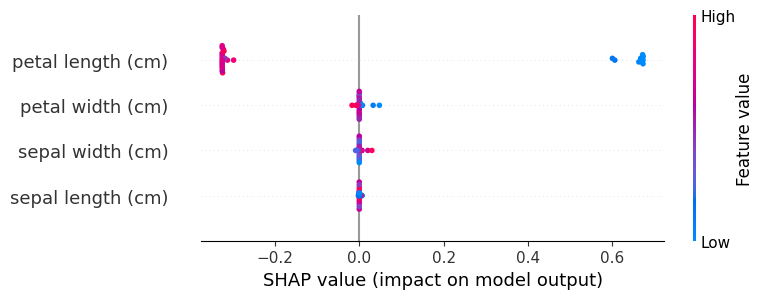

In [7]:
try:
    import shap 
except ModuleNotFoundError: 
    !pip3 install --quiet shap

import shap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

data = load_iris()
X = data.data
y = data.target

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=0)
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

explainer = shap.KernelExplainer(knn.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)
# Pour chaque exemple, on donne l'importance de chacun des descripteurs dans la décision de classification
shap.summary_plot(shap_values[0], X_test,data.feature_names)

```{prf:remark}
:class: dropdown
A partir des valeurs de Shapley, on peut expliquer les prédictions d'un modèle en utilisant la méthode SHAP (SHapley Additive exPlanations)
```